In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import logging
logger = logging.getLogger("podpac")

In [3]:
logger.setLevel(logging.DEBUG)

In [4]:
import podpac
from podpac.core.node import Node
from podpac.core.coordinates import Coordinates
import numpy as np

In [5]:
coordinates = podpac.Coordinates(
    [podpac.clinspace(90, -90, 64, 'lat'), podpac.clinspace(-180, 180, 128, 'lon'), 
    podpac.crange('2016-01-01', '2018-01-01', '1,D', 'time')]
)
coordinates

Coordinates (EPSG:4326)
	lat: UniformCoordinates1d(lat): Bounds[-90.0, 90.0], N[64], ctype['midpoint']
	lon: UniformCoordinates1d(lon): Bounds[-180.0, 180.0], N[128], ctype['midpoint']
	time: UniformCoordinates1d(time): Bounds[2016-01-01, 2018-01-01], N[732], ctype['midpoint']

In [6]:
n = podpac.algorithm.SinCoords()
np = podpac.managers.Process(source=n)
chunks={'lat':32, 'lon': 64, 'time': 512}

pp = podpac.managers.Parallel(source=np, number_of_workers=4, chunks=chunks)
ppzar = podpac.managers.ParallelOutputZarr(source=np, number_of_workers=4, chunks=chunks, zarr_file=r'C:/podpac-1.2.0/test.zarr', init_file_mode='a')

In [7]:
o = n.eval(coordinates)

In [8]:
output_format = {'format': 'zarr_part',
                 'format_kwargs': dict(part=[[0, None, None]] * 3,
                                       store=ppzar.zarr_file,
                                       mode='a')}

In [9]:
o2 = pp.eval(coordinates)

DEBUG:podpac.core.managers.parallel:Node eval with coords: (slice(0, 32, None), slice(0, 64, None), slice(0, 512, None)), Coordinates (EPSG:4326)
	lat: UniformCoordinates1d(lat): Bounds[1.4285714285714306, 90.0], N[32], ctype['midpoint']
	lon: UniformCoordinates1d(lon): Bounds[-180.0, -1.417322834645688], N[64], ctype['midpoint']
	time: UniformCoordinates1d(time): Bounds[2016-01-01, 2017-05-26], N[512], ctype['midpoint']
DEBUG:podpac.core.managers.parallel:Node eval with coords: (slice(0, 32, None), slice(0, 64, None), slice(512, 1024, None)), Coordinates (EPSG:4326)
	lat: UniformCoordinates1d(lat): Bounds[1.4285714285714306, 90.0], N[32], ctype['midpoint']
	lon: UniformCoordinates1d(lon): Bounds[-180.0, -1.417322834645688], N[64], ctype['midpoint']
	time: UniformCoordinates1d(time): Bounds[2017-05-27, 2018-01-01], N[220], ctype['midpoint']
DEBUG:podpac.core.managers.multi_process:Starting process.
DEBUG:podpac.core.managers.parallel:Node eval with coords: (slice(0, 32, None), slice(64

In [10]:
ppzar.eval(coordinates)
o3 = ppzar.dataset['data'][:]

DEBUG:podpac.core.managers.parallel:Creating Zarr file.
DEBUG:podpac.core.managers.parallel:Starting parallel eval.
DEBUG:podpac.core.managers.parallel:Node eval with coords: (slice(0, 32, None), slice(0, 64, None), slice(0, 512, None)), Coordinates (EPSG:4326)
	lat: UniformCoordinates1d(lat): Bounds[1.4285714285714306, 90.0], N[32], ctype['midpoint']
	lon: UniformCoordinates1d(lon): Bounds[-180.0, -1.417322834645688], N[64], ctype['midpoint']
	time: UniformCoordinates1d(time): Bounds[2016-01-01, 2017-05-26], N[512], ctype['midpoint']
DEBUG:podpac.core.managers.parallel:Node eval with coords: (slice(0, 32, None), slice(0, 64, None), slice(512, 1024, None)), Coordinates (EPSG:4326)
	lat: UniformCoordinates1d(lat): Bounds[1.4285714285714306, 90.0], N[32], ctype['midpoint']
	lon: UniformCoordinates1d(lon): Bounds[-180.0, -1.417322834645688], N[64], ctype['midpoint']
	time: UniformCoordinates1d(time): Bounds[2017-05-27, 2018-01-01], N[220], ctype['midpoint']
DEBUG:podpac.core.managers.para

In [11]:
# ppzar2 = podpac.data.Zarr(source=ppzar.zarr_file)
# ppzar2.native_coordinates['time'].coordinates.astype('datetime64[D]')

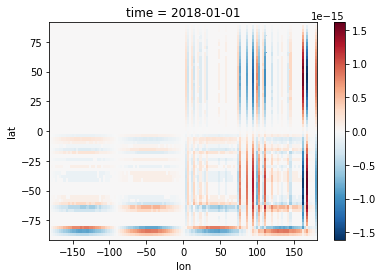

In [12]:
(o-o2)[..., -1].plot()

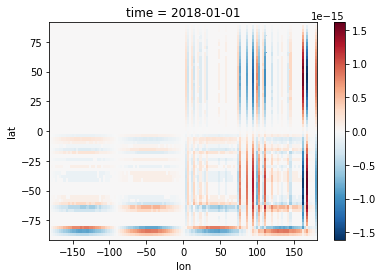

In [13]:
(o-o3)[..., -1].plot()

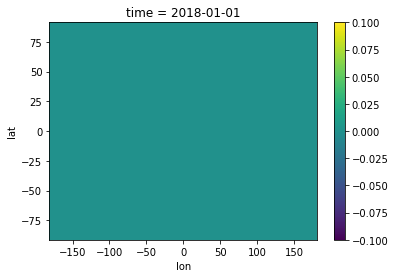

In [14]:
(o2-o3)[..., -1].plot()